### Ridge Regressor

A Ridge regressor is basically a regularized version of Linear Regressor. i.e to the original cost function of linear regressor we add a regularized term which forces the learning algorithm to fit the data and helps to keep the weights lower as possible. The regularized term has the parameter ‘alpha’ which controls the regularization of the model i.e helps in reducing the variance of the estimates.


In Ridge regression, we add some more penalty to the equation so that it will achieve low bias and low variance.
Simple linear regression: equation of line + the sum of squared residuals
Ridge regression: equation of line + the sum of squared residuals + λ x square of slope
Here, λ is called penalty. Also, the term ‘λ x square of slope ‘ is called L2 Penalty. When λ is 0, then Ridge regression will be equal to Linear regression. Addition of penalty parameter λ is called Regularization.
λ values can be anything from 0 to positive infinity.

In [ ]:
Bias happens because of inconsistent model (wrong model that does not fit the data properly).
Variance happens when the model fails to predict the results accurately (model may be good but it may not work on future data)
We need to have low bias and low variance. This means: correct model and correct predictions.
If the model shows high variance and low bias, it is called ‘overfitting’. If the model shows low variance and high bias, it is called ‘underfitting’.

Regularization is the technique to minimize the variance (or overfitting).
This is done using 
1. Ridge regression 
2. Lasso regression and 
3. ElasticNET regression.

The straight line in the simple linear regression does not have flexibility to accurately represent the arc (or curve). This is called bias. The inability of the model to accurately represent the relationship between the data points is called bias.

Fit Linear regression on training data and Ridge regression on testing data

                                          ### 1st method

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge

In [3]:
x=pd.read_csv("Desktop/train.csv")
x

,Height,Weight
0,4.0,50
1,4.5,55
2,4.7,60
3,5.0,70
4,5.1,72


In [4]:
y=pd.read_csv("Desktop/test.csv")
y

,Height,Weight
0,5.5,68
1,5.7,65
2,5.9,69
3,6.2,70
4,7.0,73


In [6]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naresh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.67965578, -1.34499816],
       [-0.40718928, -0.75508669],
       [ 0.10179732, -0.16517521],
       [ 0.86527722,  1.01464773],
       [ 1.11977052,  1.25061232]])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.3)

In [8]:
model=Ridge(alpha=0.5,normalize=False,tol=0.001,solver='auto',random_state=42)# ‘tol’ is the parameter which measures the loss drop and ensures to stop the model at that provided value position or drop at(global minima value).
model.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

In [10]:
y_pred=model.predict(x_test)

In [11]:
score=model.score(x_test,y_test)

In [12]:
print(score)

0.2981893519639948


                                   ### Second Method

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

In [14]:
x=pd.read_csv("Desktop/train.csv")
x

,Height,Weight
0,4.0,50
1,4.5,55
2,4.7,60
3,5.0,70
4,5.1,72


In [15]:
y=pd.read_csv("Desktop/test.csv")
y

,Height,Weight
0,5.5,68
1,5.7,65
2,5.9,69
3,6.2,70
4,7.0,73


In [16]:
# take the data into x and y axes
x_train = x.iloc[:, 0:1].values
y_train = x.iloc[:, 1].values
x_test = y.iloc[:, 0:1].values
y_test = y.iloc[:, 1].values

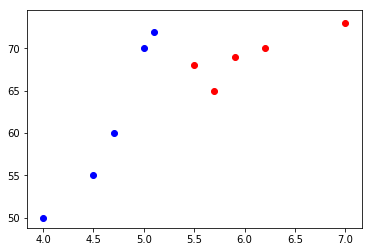

In [17]:
# draw scatter plot for train and test data separately
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='red')
plt.show()

In [18]:
# using Linear regression fit a line for the train data
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

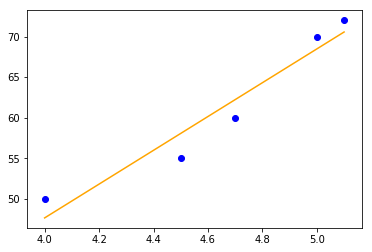

In [19]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lr.predict(x_train), color='orange')

In [20]:
# using Ridge regression to fit a line for test data
rr = Ridge(alpha=0.5) # take alpha values as: 0.05, 0.5, 1, 2, 3 and see
rr.fit(x_test, y_test)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

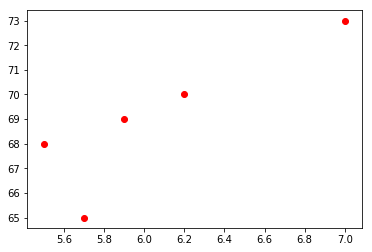

In [24]:
plt.scatter(x_test, y_test, color='red')
#plt.plot(x_test, rr.predict(y_test), color='green')
plt.show()

In [22]:
rr.predict([[6.5]])

array([70.38675214])

In [23]:
pd.DataFrame(rr.predict([[6.5]]))

,0
0,70.386752


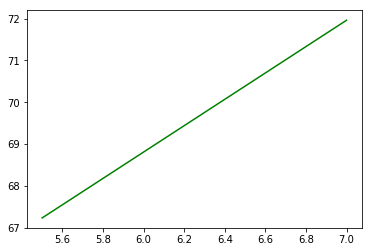

In [26]:
plt.plot(x_test, rr.predict(x_test), color='green')
plt.show()